### Interfaz Gráfica

#### Autor: Mario de la Parte Izquierdo 
#### Fecha: 30/05/2019

In [15]:
from tkinter import * # Carga módulo tk (widgets estándar) para poder crear interfaz de una aplicación
from tkinter import messagebox
from tkinter import filedialog
from tkinter import ttk

import os, sys, subprocess
from PyQt5.QtWidgets import QFileDialog
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3 # Biblioteca para la creación de la BBDD

import math # Librería para comprobar si un dato es "nan" o no

nan
No se ha introducido el Id_Asignatura: 8093.0
No se ha introducido el Id_Asignatura: 8094.0
No se ha introducido el Id_Asignatura: 8094.0
No se ha introducido el Id_Asignatura: 8095.0
No se ha introducido el Id_Asignatura: 8096.0
No se ha introducido el Id_Asignatura: 8096.0
No se ha introducido el Id_Asignatura: 8097.0
No se ha introducido el Id_Asignatura: 8097.0
No se ha introducido el Id_Asignatura: 8098.0
No se ha introducido el Id_Asignatura: 8098.0
No se ha introducido el Id_Asignatura: 8098.0
No se ha introducido el Id_Asignatura: 8099.0
No se ha introducido el Id_Asignatura: 8100.0
No se ha introducido el Id_Asignatura: 8101.0
No se ha introducido el Id_Asignatura: 8102.0
No se ha introducido el Id_Asignatura: 8103.0
No se ha introducido el Id_Asignatura: 8103.0
No se ha introducido el Id_Asignatura: 8104.0
No se ha introducido el Id_Asignatura: 8104.0
No se ha introducido el Id_Asignatura: 8105.0
No se ha introducido el Id_Asignatura: 8105.0
No se ha introducido el Id_Asi

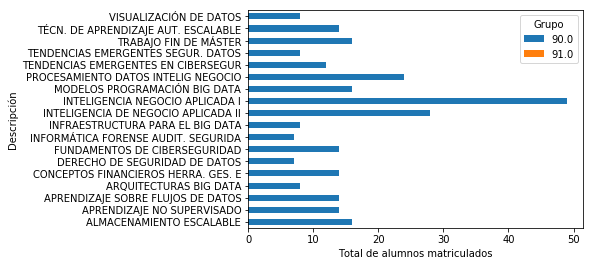

In [25]:
raiz = Tk() #Se crea el Framework o raiz principal
raiz.title("Data WareHouse") #Título de la barra superior de la ventana 
raiz.resizable(0,0) # (width,height) Para que no se pueda redimensionar la pantalla ni horizontal ni verticalmente
raiz.iconbitmap("logo.ico") # Para introducir el icono de barra superior izquierdo
#raiz.geometry("850x550") # Para fijar un tamaño de ventana(raiz). La raiz siempre se va a adaptar al tamaño de los contenedores que contenga, por eso lo dejamos comentado.
raiz.config(bg = "beige") # Fijar color de fondo

miFrame = Frame() # Se crea el Frame
miFrame.pack() # Se asigna el Frame al Framework 
#miFrame.pack(fill="both", expand = "True")
miFrame.config(bg = "powder blue") # Asignarle color de fondo
miFrame.config(width ="850", height = "550")

miFrame.config(bd=15) # Para indicar que queremos el borde más grueso
miFrame.config(relief="ridge") #Para cambiar el tipo borde

miFrame.config(cursor = "arrow") # Para cambiar el cursor  (cursor = "target") (cursor = "circle")

miLabel = Label(miFrame, text="Bienvenidos a Data WareHouse", fg="black", font=("Comic Sans MS", 18))
miLabel.place(x=10, y=20) 



# -------------------------- Funciones ----------------------------- #

""" 
Función que se encarga de la creación de la Base de Datos.
Crea una Base de Datos llamada "BBDD" con 3 tablas: ASIGNATURAS, GRUPOS y PROFESORES.
Si ya existiera creada la Base de Datos "BBDD" muestra una ventana de tipo warning 
mostrando por pantalla el mensaje: "La BBDD ya está creada".
"""
def crearBBDD():
    # La creación de la BBDD se debería ejecutar 1 única vez
    nombreBD = "BBDD" # Nombre de nuestra Base de Datos (BBDD)
    miConexion = sqlite3.connect(nombreBD) # Se crea la conexión y nuestra BBDD.
    miCursor = miConexion.cursor() # Se crea el cursor o puntero para crear una tabla.
    try:  # Por si ya estuviera creada la BBDD
        # Se crea la tabla "ASIGNATURAS"
        miCursor.execute('''
                         CREATE TABLE ASIGNATURAS(
                             Id_Asignatura  INTEGER PRIMARY KEY,
                             Descripcion VARCHAR(50),
                             Curso INTEGER, Plan VARCHAR(50),
                             Tipologia VARCHAR(10),
                             Activ VARCHAR(10),
                             Tp VARCHAR(10),
                             Vp INTEGER,
                             Turno VARCHAR(10)
                         )''') # Ejecutar la consulta en SQL para crear 1 tabla.
        # Se crea la tabla "GRUPOS"
        miCursor.execute('''
                        CREATE TABLE GRUPOS(
                            Id_Asignatura  INTEGER,
                            Id_Grupo INTEGER,
                            Temporada VARCHAR(50),
                            Total_Alumnos INTEGER,
                            PRIMARY KEY(Id_Asignatura, Id_Grupo, Temporada)
                        )''') 
        # Se crea la tabla "PROFESORES"
        miCursor.execute('''
                        CREATE TABLE PROFESORES(
                            Id_Profesor  INTEGER,
                            Id_Asignatura INTEGER,
                            Id_Grupo INTEGER,
                            Temporada VARCHAR(50),
                            Acta VARCHAR(1), 
                            Nombre_Apellidos VARCHAR(50),
                            PRIMARY KEY(Id_Profesor, Id_Asignatura, Id_Grupo, Temporada)
                        )''') 
    except: # Si la BBDD ya estuviera creada, no se crea de nuevo y realiza lo siguiente
        messagebox.showwarning("¡Atención!", "La BBDD ya está creada")
    miConexion.commit() # Se guardan los cambios anteriores
    miConexion.close() # Se cierra la conexión

""" 
Función que se encarga de abrir el fichero que se le pasa por parámetro (ruta),
siempre y cuando, este fichero se encuentre en el directorio donde nos encontremos.
Devuelve un dataFrame con todos los datos del fichero(SIN CONTAR LAS 4 PRIMERAS FILAS DE DATOS).
"""    
def CargarDatos(ruta):
    #print("Se van a cargar los datos:")
    # Esto funciona y abre el csv:
    #df = pd.read_csv('C:\\Users\\mdmar\\Desktop\\ficheroBueno.csv', sep=';',error_bad_lines=False, encoding='latin-1', header = 4)
    # Esto también funciona
    #df = pd.read_csv('ficheroBueno.csv', sep=';',error_bad_lines=False, encoding='latin-1', header = 4)
    df = pd.read_csv(ruta, sep=';',error_bad_lines=False, encoding='latin-1', header = 4)
    return df

def obtenerPlan(ruta):
    df = pd.read_csv(ruta, sep=';',error_bad_lines=False, encoding='latin-1', header = 1) 
    plan = df['Año académico:'][0]
    return plan

# AKI
def addAsignaturasRows(dataframe, plan):
    # Se inserta correctamente los datos en la BBDD.
    
    #x = float(dataframe['Código'][0])
    #if (math.isnan(x)): # No meterlo en la BBDD
    #    print("Es nan")
    #else:
    #    print(dataframe['Código'][0])
    #    print(dataframe['Código'][1])
    
    numeroFilasTotal = len(dataframe['Código']) -1 # Dá 41 filas (se le resta 1 por la primera fila, ya que es un valor nan[celda vacía])
    numeroFila = 1
    cont = 10
    
    while (numeroFila <= numeroFilasTotal):
        #aux = float(dataframe['Código'][numeroFila]) # Se obtiene el Codigo para comprobar despues si no es un valor "nan"
        #if (math.isnan(aux) == False): # Comprobación para no meter valores "nan" en la BBDD.
        
        #print(dataframe['Código'][numeroFila]) # Código de la Asignatura
        #print(dataframe['Descripción'][numeroFila])# Descripción de la Asignatura
        #print(dataframe['Curso'][numeroFila]) # Curso de la Asignatura
        #print("---------------------------")
        
        # -------------Se obtienen los datos a insertar fila a fila:-------------
        cod = dataframe['Código'][numeroFila]
        des = dataframe['Descripción'][numeroFila]
        cur = dataframe['Curso'][numeroFila]
       
        # Plan no aparece en el dataframe, luego se le pasa por cabecera (anteriormente se obtiene con función obtenerPlan)
        pla = plan #"Plan 263 - MÁSTER UNIVERSITARIO EN INTELIGENCIA DE NEGOCIO Y BIG DATA EN ENTORNOS SEGUROS" 
        
        tip = dataframe['Tipología académica'][numeroFila]
        act = dataframe['Activ.'][numeroFila]
        tp = dataframe['Tp'][numeroFila]
        vp = dataframe['Vp'][numeroFila]
        tur = dataframe['Turno'][numeroFila]
        # --------------------------------------------------------------------------
        # Se introducen los valores de tabla ASIGNATURAS en la BBDD:
        #try: 
        r = hacer_consulta("INSERT INTO ASIGNATURAS VALUES("+str(cod)+", '"+des+"',"+str(cur)+", '"+pla+"', '"+tip+"','"+act+"','"+tp+"',"+str(vp)+",'"+tur+"')") 
        if(r==2):
            print("No se ha introducido el Id_Asignatura: "+str(cod))
        cont = cont + 1
        #except: # Si hubiera problemas con la clave primaria por ejemplo -> no introducir en la BBDD
            #print("Error en : "+str(numeroFila) )
    
        numeroFila = numeroFila + 1 # Se incrementa el número de filas (contador)
        
""" 
Función que se encarga de mostrar una ventana del sistema operativo 
que nos permite seleccionar archivos. 
......
......
"""
def BotonCargar():
    raiz.fileName = filedialog.askopenfilename( filetypes=((".xls (No parseados)", "*.xls"),(".csv (Ya parseados)", "*.csv"),("Todos los ficheros","*.*")), title = "Seleccione un archivo")
    #print(raiz.fileName) # En "raiz.fileName" se almacena la ruta del archivo seleccionado (sin comillas). Por ej: C:/Users/mdmar/Desktop/ficheroBueno.csv
    nombreArchivo = raiz.fileName.split('/')[-1] # Se divide por "/" el string de la ruta y se obtiene la última posición con [-1]
    #aux = '"'+ nombreArchivo +'"' # Se entrecomilla el nombre del archivo
    #print(nombreArchivo)
    #ERROR: La ruta debería ser así: C:\Users\mdmar\Desktop\ficheroBueno.csv y la obtengo con las / (es decir, al revés)
    #fichero = open("C:/Users/mdmar/Desktop/datos.xls")
    df = CargarDatos(nombreArchivo)
    #print(df) # Muestra toda la información
    #print(df['Nombre y Apellidos'])  # Muestra columna deseada
    dframe = pd.DataFrame(df) # Se crea el DataFrame de los datos
    
    temporada = dframe.iloc[0,2]
    print(temporada)
    
    #print("Aqui en vez de utilizarlo para obtener directamente el grafico, se deberia meter la info relevante en la BBDD.")
    #dframe()
    plan = obtenerPlan(nombreArchivo) # Se almacena el nombre del plan (263 - MÁSTER UNIVERSITARIO EN INTELIGENCIA DE NEGOCIO Y BIG DATA EN ENTORNOS SEGUROS)
    addAsignaturasRows(dframe, plan)
    
    # Se muestra un gráfico (Estas 2 lineas son de prueba)
    dframe.groupby(['Grupo','Descripción'])['Total'].sum().unstack('Grupo').plot(kind='barh', legend='Reverse', stacked =True)
    plt.xlabel('Total de alumnos matriculados')

def BotonGrafica1():
    #print("Mostrar Gráfica 1")    
    get_Asignaturas()
    
""" 
Función que se encarga de mostrar una ventana emergente con 2 opciones para 
confirmar si se quiere salir de la aplicaión. Si se pulsa que sí, 
se cierra la aplicación, si se pulsa que no, se continúa en la misma.
"""
def salir():
    valor = messagebox.askquestion("Salir","¿Desea salir de la aplicación?")
    if valor == "yes":
        raiz.destroy()

        
        
""" 
Función que se encarga de realizar consultas a la Base de Datos.
Realiza la consulta que se le pase por parámetro(consulta) y devuelve 
un cursor con el resultado de la misma.
"""        
def hacer_consulta(consulta, parametros = () ):
    nombreBD = "BBDD"
    with sqlite3.connect(nombreBD) as conn:
        cursor = conn.cursor()
        try:  
            result = cursor.execute(consulta, parametros)
            conn.commit()
            return result
        except:
            return 2
            
    

def get_Asignaturas():
    #todos_elemenos_tabla = tree.get_children() # Para limpiar la tabla
    #for e in todos_elemenos_tabla:
        #tree.delete(e)
    
    # Consultar los datos
    consulta = 'SELECT * FROM ASIGNATURAS ORDER BY Id_Asignatura DESC'
    filas_Asignaturas = hacer_consulta(consulta)
    
    #print(filas_Asignaturas) # Hasta aqui llega
    
    # Rellenar los datos
    for row in filas_Asignaturas:
        print(row)
    
    
# --------------------------------------------- Pantalla para Confirmar la Salida -------------------------------- #
"""class MyDialog:
    def __init__(self, parent):
        self.top = Toplevel(parent)
        self.parent = parent
        self.top.title("Salir")

        Label(self.top, text="¿Está seguro?").grid(row=0, column=0, columnspan=2)

        self.button1 = Button(self.top, text="Si, salir de la app.", command=self.salir)
        self.button2 = Button(self.top, text="No, solo minimizar.", command=self.minimizar)
        self.button1.grid(row=1, column=0, padx=5, pady=5)
        self.button2.grid(row=1, column=1, padx=5, pady=5)

    def salir(self):
        self.top.destroy()
        self.parent.destroy()

    def minimizar(self):
        self.top.destroy()
        self.parent.iconify()

class MyApp:
    def __init__(self, parent):
        self.parent = parent
        self.parent.protocol("WM_DELETE_WINDOW", self.on_closing)

    def on_closing(self):
        d = MyDialog(raiz)
        self.parent.wait_window(d.top)

app = MyApp(raiz)"""

# --------------------------------------------- Fin de Pantalla para Confirmar Salida -------------------------------- #



def open_file(filename):   # Answer of stackoverflow
    if sys.platform == "win32":
        os.startfile(filename)
    else:
        opener = "open" if sys.platform == "darwin" else "xdg-open"
        subprocess.call([opener, filename])

        
""" Classs to create the main menu for set app parameters and show the help file"""
class GuiMenu:
    def __init__(self, master):
        self.master = master
        self.menu = Menu(master)
        master.config(menu=self.menu)

        self.submenu = Menu(self.menu)

        # ------------------ Sub Menu Configuración ------------------ #
        self.submenu_config = Menu(self.submenu)
        # Options of submenu
        self.submenu_config.add_command(label="1", command=self.set1)
        self.submenu_config.add_command(label="2", command=self.set2)
        self.submenu_config.add_command(label="3", command=self.set3)
        self.submenu_config.add_command(label="4", command=self.set4)
        self.submenu.add_cascade(label="Máx Gráficos", menu=self.submenu_config)


         # ------------------ Main Options of the Menu ------------------ #
        self.menu.add_cascade(label = "Configuración", underline = 0, menu = self.submenu)
        self.menu.add_command(label = "Ayuda",  command = self.open)
        self.menu.add_command(label="Acerca de...", command = self.openAbout)
        
    def open(self):
        open_file('ayuda.pdf') # Se abre el pdf de ayuda

    def openAbout(self):
        open_file('about.pdf') # Se abre el pdf de acerca de
        
    def set1(self):
        global max_p
        max_p = 1

    def set2(self):
        global max_p
        max_p = 2

    def set3(self):
        global max_p
        max_p = 3

    def set4(self):
        global max_p
        max_p = 4

        
    def log(self):
        x, y = get_window_pos(self.master)
        self.master.destroy()
        global ext_flag, log_flag
        ext_flag = False
        log_flag = True
        aneca_login(x, y)

    def extract(self):
        x, y = get_window_pos(self.master)
        self.master.destroy()
        global ext_flag, log_flag
        ext_flag = True
        log_flag = False
        get_only_info_window(x, y)

    def full_process(self):
        x, y = get_window_pos(self.master)
        self.master.destroy()
        global ext_flag, log_flag
        ext_flag = True
        log_flag = True
        info_window(x, y)
        
# -------------------------- Botones ----------------------------- #        
botonCrearBBDD = Button(raiz, text="Crear BBDD", command=crearBBDD)
botonCrearBBDD.place(x=40, y=90) 

botonCargar = Button(raiz, text="Cargar Archivos", command = BotonCargar)
botonCargar.place(x=160, y=90) 

botonGrafica1 = Button(raiz, text="Visualizar Gráfica 1", command = BotonGrafica1)
botonGrafica1.place(x=310, y=90) 

botonSalir = Button(raiz, text="Salir", command=salir)
botonSalir.place(x=310, y=350) 


menu = GuiMenu(raiz) # Se llama a la clase anterior y se crea el menu.


raiz.mainloop() # Para que se ejecute continuamente 

#### Ventanas Bloqueantes (hasta que no contestas o cierras no puedes avanzar)

In [2]:
from tkinter.messagebox import *
#askokcancel("hola", "que tal todo")
"""if askquestion("pregunta", "¿quieres guardar los resultados?") == 'yes':
    print("has dicho que si")
else:
    print("has dicho que no")"""
#askretrycancel("title", "message")
#askyesno("title", "message") 

has dicho que no


In [2]:
#print(askfloat('Entry', 'Enter float'))  # Espera hasta que metes un decimal y te lo devuelve 
#print(askinteger('Entry', 'Enter integer')) # " "                    entero   "   "
#print(askstring('Entry', 'Enter string')) # "  "                     cadena    "  "

#### Ventanas que muestran un mensaje de error

In [10]:
#showerror("title", "message") # Muestra aspa roja
#showinfo("title", "message") # Muestra círculo azul de información 
#showwarning("title", "message") # Muestra triángulo amarillo

'ok'

#### Botón para GUARDAR un archivo (similar al de CARGAR)

In [12]:
#raiz.fileName = filedialog.asksaveasfilename( filetypes=((".pdf", "*.pdf"),(".tex (Latex)", "*.tex"),("Todos los ficheros","*.*")), title = "Guardar el archivo")


In [12]:
hoy = "dia"
print ('la fecha es "'+hoy+'"')

la fecha es "dia"


In [17]:
fichero = open("C:/Users/mdmar/Desktop/datos.xls")
print(fichero)

<_io.TextIOWrapper name='C:/Users/mdmar/Desktop/datos.xls' mode='r' encoding='cp1252'>
